# Лабораторная работа №5

*Водяный Михаил, РИ-440005*

## Задание

Разработать программу для вычисления циклических избыточных кодов. Для всех многочленов от 0x00000000 до 0xffffffff вычислить 8-битовый остаток от деления на заданный в варианте 9-разрядный делитель (порождающий многочлен). Построить гистограмму распределения остатков. Модернизировать программу для определения пригодности многочлена-делителя для вычисления CRC, на основании повторяемости остатков при расстоянии между многочленами-делимыми в 1.

## 1. Определение функций

In [16]:
import numpy as np

def CRC_generate_table(p):
    crc_table = []
    for i in range(0, 256):
        for b in range(0, 8):
            i = (i >> 1) ^ p if i & 1 else i >> 1
        crc_table.append(np.uint8(i))
    return crc_table

In [17]:
def CRC_calculate(data, table, crc = 0):
    for b in data:
        crc = table[(crc ^ ord(b)) & 0xFF] ^ (crc >> 8)
    return np.uint8(crc)

In [18]:
from matplotlib import pyplot
from collections import Counter as count

def init_plot(title='', y='', x='', size=None, xlim=None, ylim=None):
    plt = pyplot
    plt.title(title)
    plt.ylabel(y)
    plt.xlabel(x)
    if size is not None: plt.gcf().set_size_inches(size)
    if xlim is not None: plt.xlim = xlim
    if ylim is not None: plt.ylim = ylim
    return plt

def draw_rem_hist(table):
    plt = init_plot('гистограмма распределения остатков', y='частота', x='остаток', size=(100,50))
    rem_counter = count(table)
    Y = list(rem_counter.values())
    X = list(rem_counter.keys())
    plt.bar(range(len(Y)), Y, align='center')
    plt.xticks(Y, X)
    plt.show()

In [28]:
from collections import Counter as count

def CRC_check_table(table): 
    most_common=count(table).most_common() 
    if (most_common[0][1] == 1):
        return 'Пригодна'
    else:
        return 'Не пригодна'

## 2. Тестирование

### Формирование таблицы CRC на основе заданного делителя

In [20]:
polynomial = 489 #6 вариант
my_crc8_table = CRC_generate_table(polynomial)

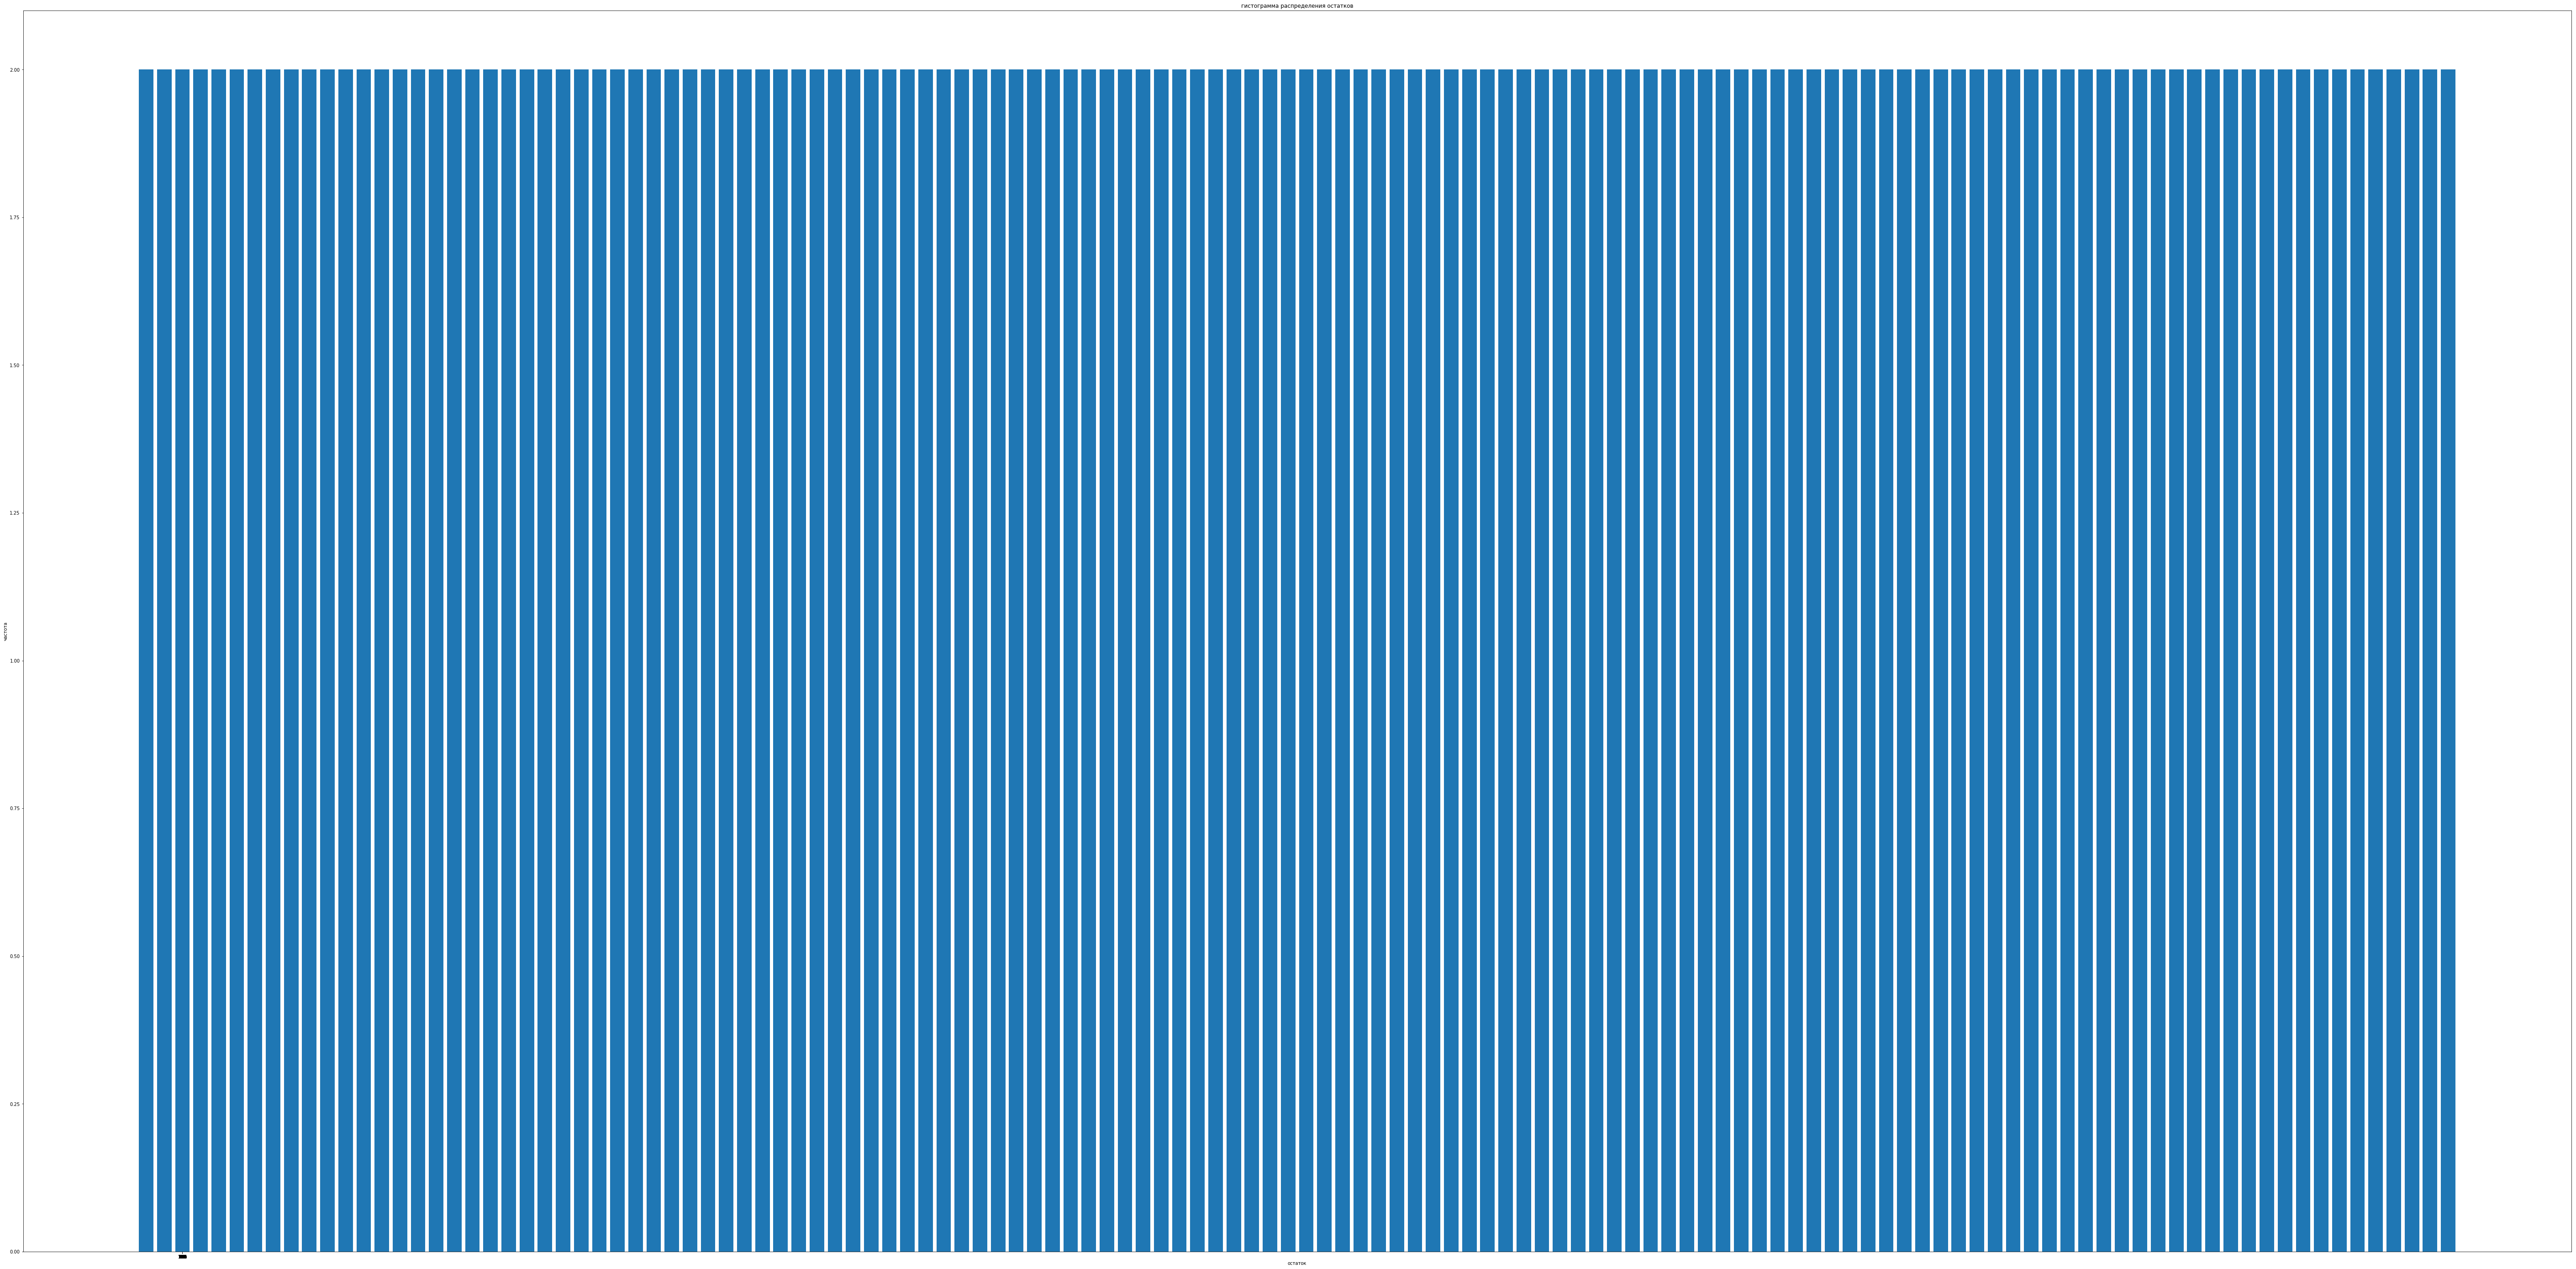

In [21]:
draw_rem_hist(my_crc8_table)

In [23]:
filename = 'a06.txt'

with open(filename, 'r') as file:
    text = file.read()
    
crc = CRC_calculate(text, my_crc8_table)
print(crc)

50


In [26]:
# Проверим сформированную контрольную сумму для того же текста после имитации передачи

if (CRC_calculate(text, my_crc8_table) == crc):
    print('Данные получены без потерь') 
else:
    print('При передаче возникли помехи')


Данные получены без потерь


### Таблицу необходимо проверить на пригодность для вычисления CRC


In [29]:
#Модернизировать программу для определения пригодности многочлена-делителя для вычисления CRC, 
#на основании повторяемости остатков при расстоянии между многочленами-делимыми в 1.
CRC_check_table(my_crc8_table)

'Не пригодна'